In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import aubio
import matplotlib.pyplot as plt
import pandas as pd
import glob
 
from IPython import display
from pathlib import PurePath

import vxs
import vxs.utils as vxsu

In [2]:
BEATBOXSET1_DIR = '../data/beatboxset1'
AVP_DIR = '../data/avp-dataset/AVP_Dataset'

plt.rcParams.update({'font.size': 16})    

In [3]:
beatboxset1_DR = vxs.Beatbox1TrackSet(BEATBOXSET1_DIR, annotation_type='DR')
beatboxset1_HT = vxs.Beatbox1TrackSet(BEATBOXSET1_DIR, annotation_type='HT')

In [10]:
track_sh, onsets_DR = beatboxset1_DR.get('callout_luckeymonkey')
_, onsets_HT = beatboxset1_HT.get('callout_luckeymonkey')

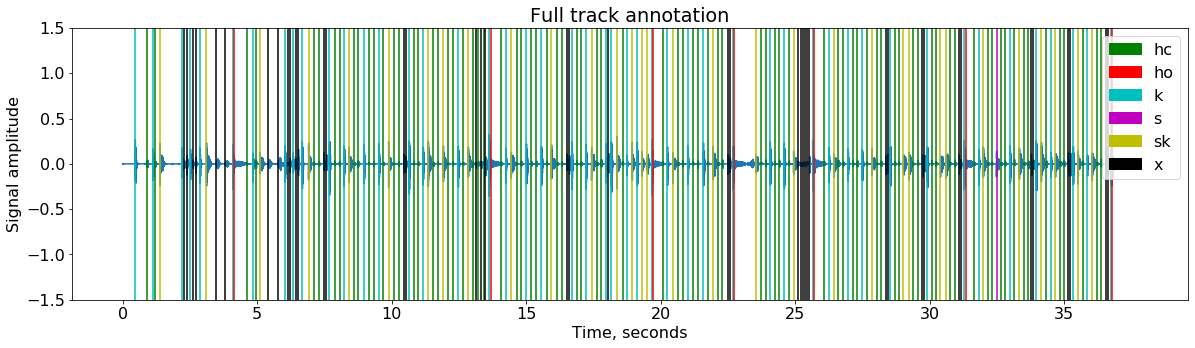

In [11]:
vxsu.plot_track(track_sh, onsets=onsets_DR, color_events=True, title='Full track annotation')

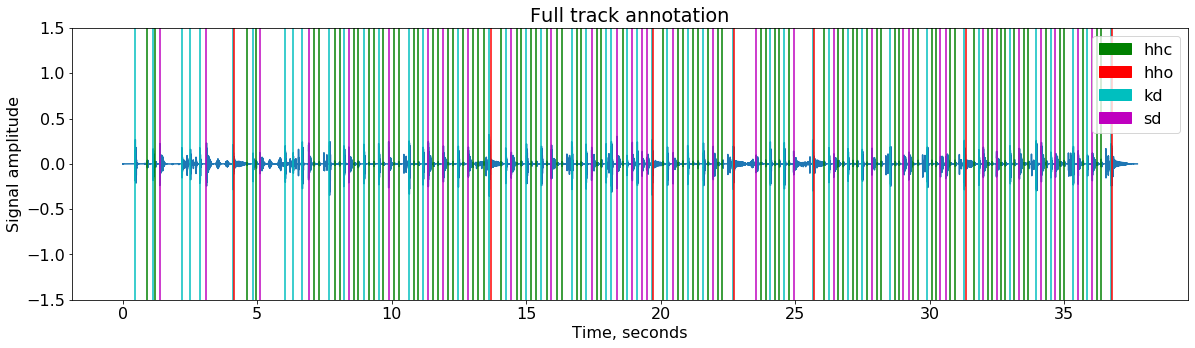

In [12]:
onsets_DR_cleaned = vxs.map_annotation(onsets_DR, vxs.constants.BEATBOXSET1_CLASS_MAP)
vxsu.plot_track(track_sh, onsets=onsets_DR_cleaned, color_events=True, title='Full track annotation')

In [13]:
vxsu.play_audio(track_sh)

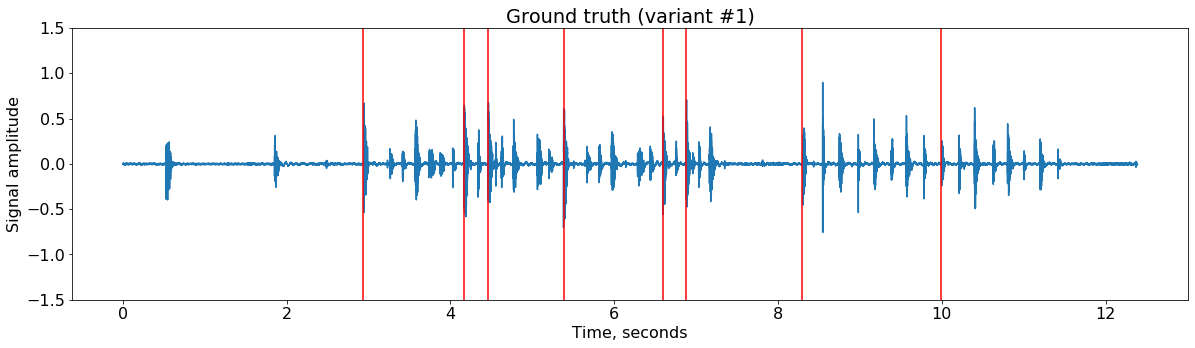

In [6]:
kick_events = vxsu.plot_track(track_sh, onsets=onsets_DR, event_type='k', title='Ground truth (variant #1)', return_events=True)

In [7]:
classes = onsets_DR['class'].unique()
classes

array(['s', 'br', 'k', 'ho', 'hc'], dtype=object)

In [8]:
onsets_HT['class'].unique()

array(['sb', 'k', 'hc', 's', 'sk', 'br'], dtype=object)

In [9]:
df = pd.DataFrame(columns=classes, index=classes, dtype=int).fillna(0)

In [10]:
vxsu.play_audio(track_sh)

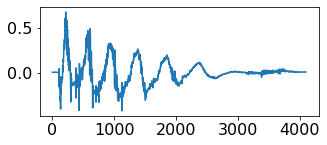

In [11]:
segm = vxsu.plot_segment(track_sh, kick_events[2])

In [12]:
vxsu.play_audio(segm)

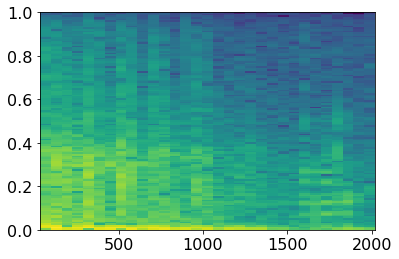

In [13]:
_ = plt.specgram(segm.wave, Fs=2)

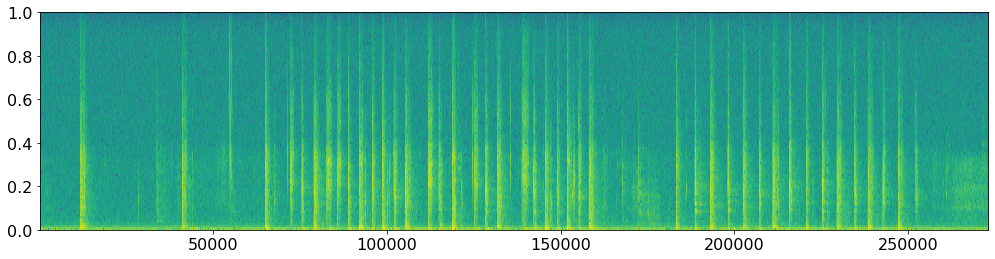

In [14]:
fig = plt.figure(figsize=(17,4))
_ = plt.specgram(track_sh.wave, Fs=2)

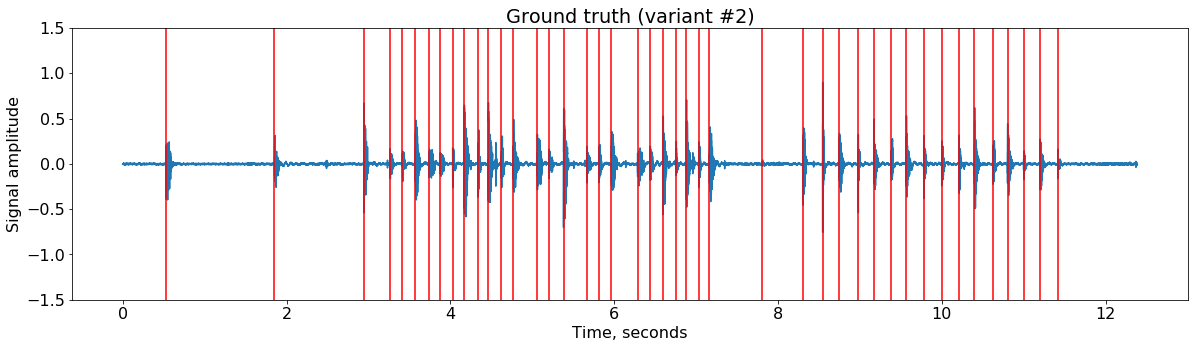

In [15]:
vxsu.plot_track(track_sh, onsets=onsets_HT, title='Ground truth (variant #2)')

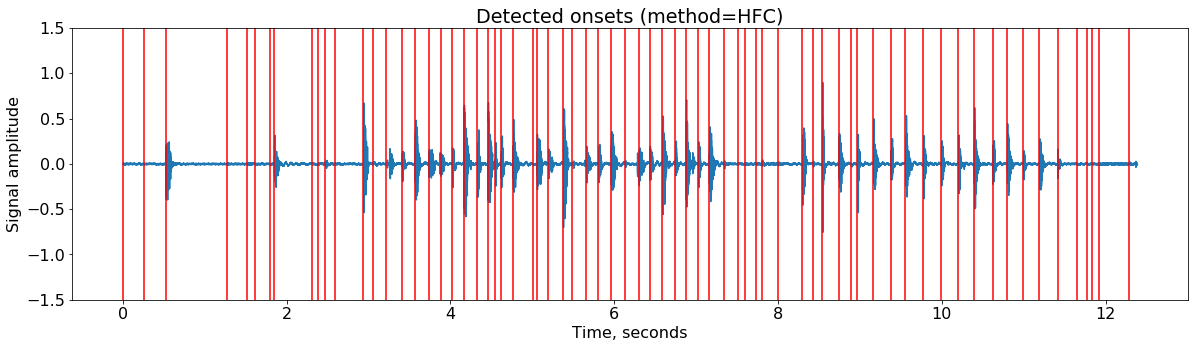

In [16]:
onsets_detected_hfc = vxs.detect_onsets(track_sh, method='hfc')
vxsu.plot_track(track_sh, onsets=onsets_detected_hfc, title='Detected onsets (method=HFC)')

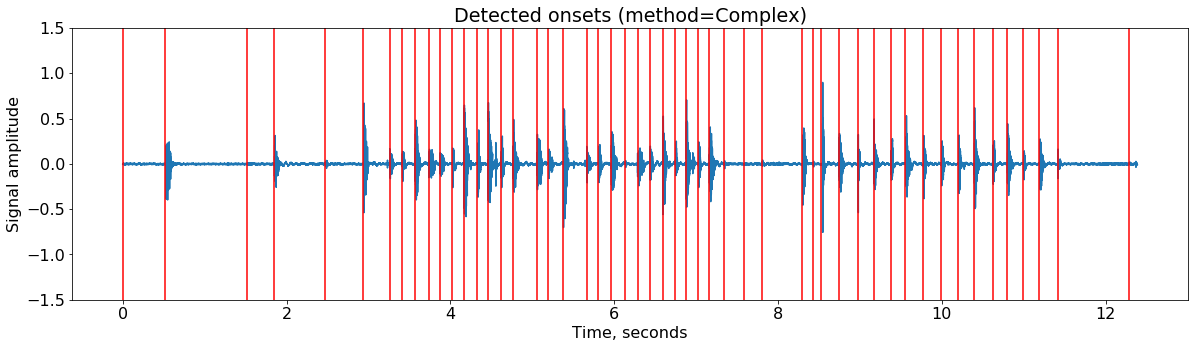

In [18]:
onsets_detected_cp = vxs.detect_onsets(track_sh, method='complex')
vxsu.plot_track(track_sh, onsets=onsets_detected_cp, title='Detected onsets (method=Complex)')

In [19]:
beats, tempo = vxs.detect_beats(track_sh, method='complex')
print(tempo)

200.04534159614502


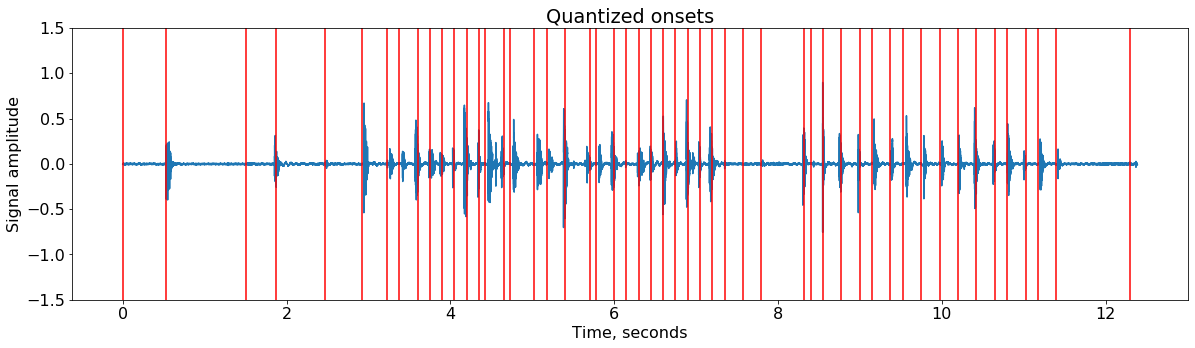

In [23]:
onsets_steps, onsets_times_qq = vxs.quantize_onsets(onsets_detected_cp['time'].values, tempo)
vxsu.plot_track(track_sh, onsets=onsets_times_qq, title='Quantized onsets')

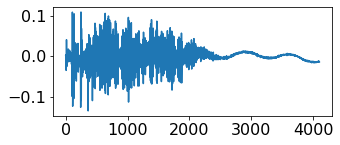

In [24]:
segm = vxsu.plot_segment(track_sh, onsets_detected_cp['time'][10])

In [25]:
vxsu.play_audio(segm)

In [26]:
vxs.onsets_F1_score(onsets_detected_hfc['time'].values, onsets_DR['time'].values, ms_threshold=10)

0.6837606837606838

In [27]:
scores_DR = vxs.dataset_onset_scores(beatboxset1_DR, methods=['hfc', 'complex', 'specflux'])
scores_HT = vxs.dataset_onset_scores(beatboxset1_HT, methods=['hfc', 'complex', 'specflux'])

In [28]:
bbs_scores = pd.merge(scores_DR, scores_HT, on='track', suffixes=('_DR', '_HT'))

In [29]:
bbs_scores

track  hfc_F1_DR  hfc_prec_DR  hfc_rec_DR  complex_F1_DR  \
0          putfile_vonny   0.892857     0.808824    0.996377       0.919463   
1            putfile_bui   0.901564     0.829103    0.987903       0.921624   
2   putfile_dbztenkaichi   0.844444     0.772727    0.930836       0.885517   
3   callout_luckeymonkey   0.946136     0.935185    0.957346       0.942928   
4          callout_azeem   0.932886     0.917492    0.948805       0.926746   
5     callout_Turn-Table   0.907801     0.836601    0.992248       0.933824   
6        putfile_pepouni   0.865568     0.777259    0.976517       0.873462   
7           callout_mcld   0.859375     0.774648    0.964912       0.933333   
8         battleclip_daq   0.941989     0.921622    0.963277       0.939007   
9      callout_Pneumatic   0.964187     0.940860    0.988701       0.983051   
10         callout_mouss   0.944444     0.916168    0.974522       0.948718   
11       putfile_william   0.954424     0.927083    0.983425       0.988950   
12         callout_adiao   0.971751     0.959108    0.984733       0.971319   
13             snare_hex   0.752137     0.619718    0.956522       0.877551   

    complex_prec_DR  complex_rec_DR  specflux_F1_DR  specflux_prec_DR  \
0          0.856250        0.992754        0.888169          0.803519   
1          0.866785        0.983871        0.862989          0.772293   
2          0.849206        0.925072        0.818408          0.719912   
3          0.989583        0.900474        0.951501          0.927928   
4          0.925170        0.928328        0.918469          0.896104   
5          0.888112        0.984496        0.851351          0.754491   
6          0.792663        0.972603        0.836120          0.729927   
7          0.925287        0.941520        0.852868          0.743478   
8          0.943020        0.935028        0.927497          0.899204   
9          0.983051        0.983051        0.953678          0.921053   
10         0.954839        0.942675        0.897959          0.827957   
11         0.988950        0.988950        0.896725          0.824074   
12         0.973180        0.969466        0.950820          0.909408   
13         0.826923        0.934783        0.715447          0.571429   

    specflux_rec_DR  hfc_F1_HT  hfc_prec_HT  hfc_rec_HT  complex_F1_HT  \
0          0.992754   0.908546     0.891176    0.926606       0.911901   
1          0.977823   0.892606     0.857868    0.930275       0.915162   
2          0.948127   0.819427     0.787081    0.854545       0.865007   
3          0.976303   0.953052     0.939815    0.966667       0.945274   
4          0.941980   0.923333     0.914191    0.932660       0.927242   
5          0.976744   0.914676     0.875817    0.957143       0.932862   
6          0.978474   0.852146     0.834891    0.870130       0.849558   
7          1.000000   0.863874     0.774648    0.976331       0.938776   
8          0.957627   0.916667     0.891892    0.942857       0.924394   
9          0.988701   0.955307     0.919355    0.994186       0.968481   
10         0.980892   0.937500     0.898204    0.980392       0.941558   
11         0.983425   0.957219     0.932292    0.983516       0.991736   
12         0.996183   0.965909     0.947955    0.984556       0.965385   
13         0.956522   0.765217     0.619718    1.000000       0.916667   

    complex_prec_HT  complex_rec_HT  specflux_F1_HT  specflux_prec_HT  \
0          0.921875        0.902141        0.871257          0.853372   
1          0.900533        0.930275        0.855925          0.799363   
2          0.873016        0.857143        0.805226          0.741794   
3          0.989583        0.904762        0.958333          0.932432   
4          0.931973        0.922559        0.905785          0.889610   
5          0.923077        0.942857        0.853420          0.784431   
6          0.842105        0.857143        0.822444          0.781022   
7          0.925287        0.952663       

In [30]:
bbs_scores.mean()

hfc_F1_DR           0.905683
hfc_prec_DR         0.852600
hfc_rec_DR          0.971866
complex_F1_DR       0.931821
complex_prec_DR     0.911644
complex_rec_DR      0.955934
specflux_F1_DR      0.880143
specflux_prec_DR    0.807198
specflux_rec_DR     0.975397
hfc_F1_HT           0.901820
hfc_prec_HT         0.863207
hfc_rec_HT          0.949990
complex_F1_HT       0.928143
complex_prec_HT     0.923081
complex_rec_HT      0.934546
specflux_F1_HT      0.868718
specflux_prec_HT    0.809891
specflux_rec_HT     0.944491
dtype: float64

In [31]:
bbs_scores.std()

hfc_F1_DR           0.059889
hfc_prec_DR         0.095920
hfc_rec_DR          0.018950
complex_F1_DR       0.035834
complex_prec_DR     0.065058
complex_rec_DR      0.029478
specflux_F1_DR      0.064810
specflux_prec_DR    0.100887
specflux_rec_DR     0.017890
hfc_F1_HT           0.058356
hfc_prec_HT         0.087846
hfc_rec_HT          0.044285
complex_F1_HT       0.037629
complex_prec_HT     0.046198
complex_rec_HT      0.044273
specflux_F1_HT      0.063930
specflux_prec_HT    0.095041
specflux_rec_HT     0.042342
dtype: float64

In [32]:
def prec_rec_bar_plot(scores, labels, precs, recs, title='precision/recall'):
    mean_scores = scores.mean()
    precisions = mean_scores[precs]
    recalls = mean_scores[recs]
    
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(10, 5))
    rects1 = ax.bar(x - width/2, precisions, width, label='Precision')
    rects2 = ax.bar(x + width/2, recalls, width, label='Recall')

    ax.set_ylabel('Scores')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    fig.tight_layout()
    plt.show()

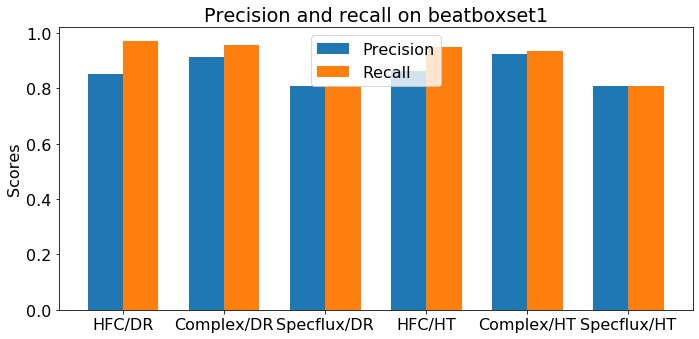

In [33]:
labels = ['HFC/DR', 'Complex/DR', 'Specflux/DR', 'HFC/HT', 'Complex/HT', 'Specflux/HT']
precs = ['hfc_prec_DR', 'complex_prec_DR', 'specflux_prec_DR', 'hfc_prec_HT', 'complex_prec_HT', 'specflux_prec_HT']
recs = ['hfc_rec_DR', 'complex_rec_DR', 'specflux_prec_DR', 'hfc_rec_HT', 'complex_rec_HT', 'specflux_prec_HT']

prec_rec_bar_plot(bbs_scores, labels, precs, recs, title='Precision and recall on beatboxset1')

In [34]:
avp_set = vxs.AVPTrackSet(AVP_DIR)
avp_scores = vxs.dataset_onset_scores(avp_set, methods=['hfc', 'complex', 'specflux'])

In [35]:
avp_scores

track    hfc_F1  hfc_prec  hfc_rec  complex_F1  \
0            P8_Snare_Personal  0.923077  0.857143      1.0    0.913043   
1         P8_HHopened_Personal  0.960000  0.923077      1.0    0.897959   
2    P8_Improvisation_Personal  0.854545  0.746032      1.0    0.938776   
3             P8_Kick_Personal  0.979592  0.960000      1.0    0.958333   
4         P8_HHclosed_Personal  0.941176  0.888889      1.0    0.920000   
..                         ...       ...       ...      ...         ...   
260            P27_Snare_Fixed  0.938776  0.884615      1.0    0.958333   
261         P27_HHopened_Fixed  0.938776  0.884615      1.0    0.958333   
262    P27_Improvisation_Fixed  0.917647  0.847826      1.0    0.968944   
263         P27_HHclosed_Fixed  0.920000  0.851852      1.0    0.978723   
264             P27_Kick_Fixed  0.938776  0.884615      1.0    0.958333   

     complex_prec  complex_rec  specflux_F1  specflux_prec  specflux_rec  
0        0.954545     0.875000     0.923077       0.857143      1.000000  
1        0.880000     0.916667     0.941176       0.888889      1.000000  
2        0.901961     0.978723     0.846847       0.734375      1.000000  
3        0.958333     0.958333     0.960000       0.923077      1.000000  
4        0.884615     0.958333     0.941176       0.888889      1.000000  
..            ...          ...          ...            ...           ...  
260      0.920000     1.000000     0.920000       0.851852      1.000000  
261      0.920000     1.000000     0.920000       0.851852      1.000000  
262      0.939759     1.000000     0.881356       0.787879      1.000000  
263      0.958333     1.000000     0.862745       0.785714      0.956522  
264      0.920000     1.000000     0.958333       0.920000      1.000000  

[265 rows x 10 columns]

In [36]:
avp_scores[avp_scores['hfc_F1'] == 0]

track  hfc_F1  hfc_prec  hfc_rec  complex_F1  complex_prec  \
148  P4_HHclosed_Fixed     0.0       0.0      0.0         0.0           0.0   

     complex_rec  specflux_F1  specflux_prec  specflux_rec  
148          0.0          0.0            0.0           0.0

In [37]:
track, annotation = avp_set.get('P8_HHopened_Personal')
onsets_pred = vxs.detect_onsets(track, method='complex')

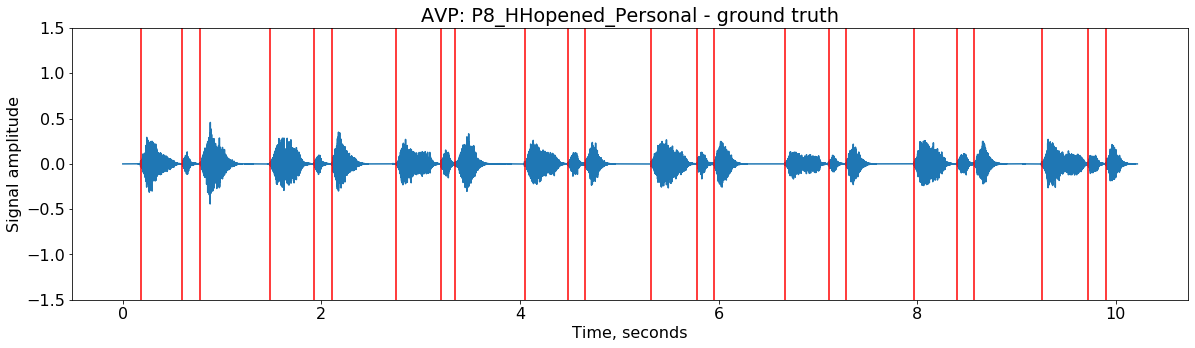

In [38]:
vxsu.plot_track(track, onsets=annotation, title='AVP: P8_HHopened_Personal - ground truth')

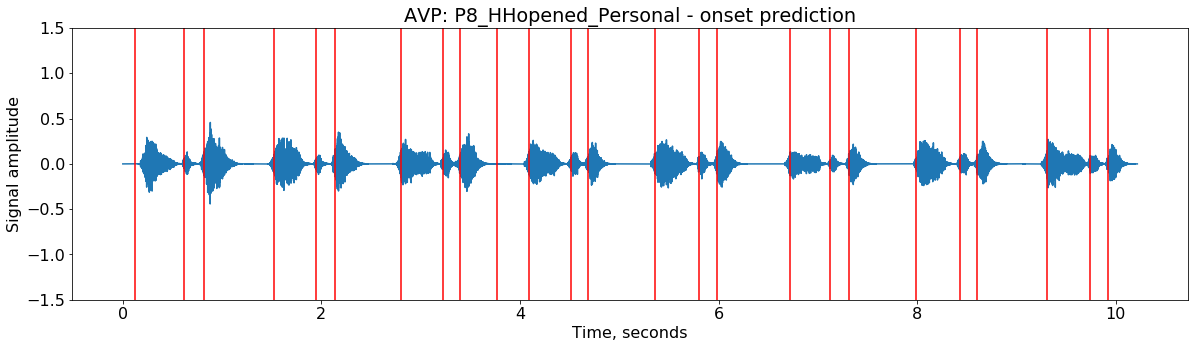

In [39]:
vxsu.plot_track(track, onsets=onsets_pred, title='AVP: P8_HHopened_Personal - onset prediction')

In [40]:
beats, tempo = vxs.detect_beats(track, method='complex')
print(tempo)

94.26098029180191


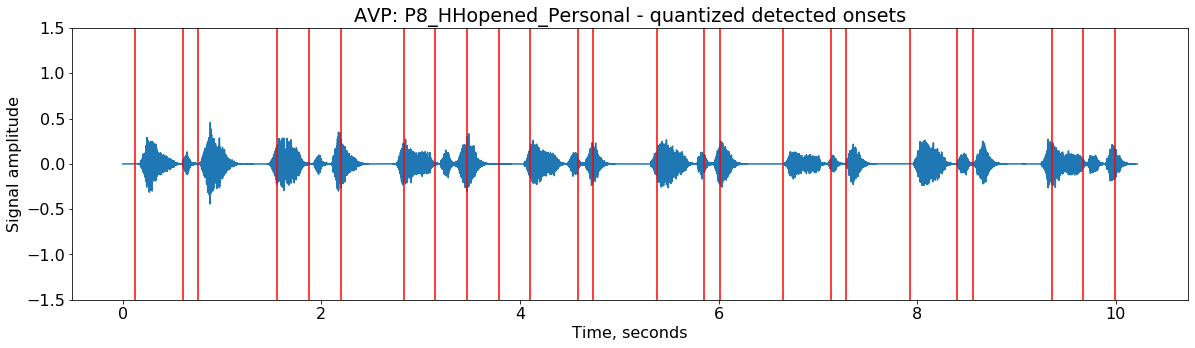

In [43]:
onsets_steps, onsets_q = vxs.quantize_onsets(onsets_pred['time'].values, tempo)
vxsu.plot_track(track, onsets=onsets_q, title='AVP: P8_HHopened_Personal - quantized detected onsets')

In [44]:
onsets_steps

array([ 0,  3,  4,  9, 11, 13, 17, 19, 21, 23, 25, 28, 29, 33, 36, 37, 41,
       44, 45, 49, 52, 53, 58, 60, 62])

In [37]:
avp_scores.mean()

hfc_F1           0.883038
hfc_prec         0.810385
hfc_rec          0.983208
complex_F1       0.930681
complex_prec     0.911859
complex_rec      0.955990
specflux_F1      0.852366
specflux_prec    0.763089
specflux_rec     0.980446
dtype: float64

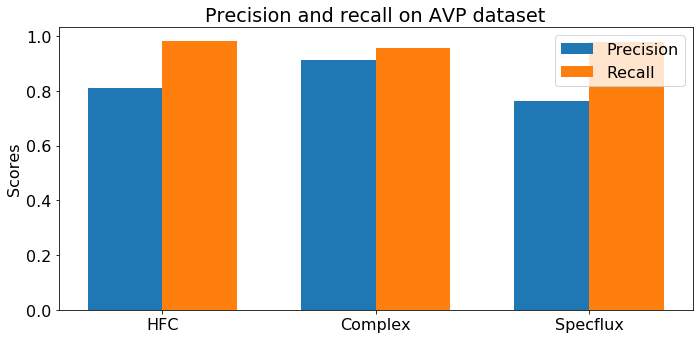

In [38]:
labels = ['HFC', 'Complex', 'Specflux']
precs = ['hfc_prec', 'complex_prec', 'specflux_prec']
recs = ['hfc_rec', 'complex_rec', 'specflux_rec']

prec_rec_bar_plot(avp_scores, labels, precs, recs, title='Precision and recall on AVP dataset')

In [39]:
avp_scores_tight = vxs.dataset_onset_scores(avp_set, ms_threshold=10, methods=['hfc', 'complex', 'specflux'])

In [40]:
avp_scores_tight

track    hfc_F1  hfc_prec   hfc_rec  complex_F1  \
0            P8_Snare_Personal  0.115385  0.107143  0.125000    0.260870   
1         P8_HHopened_Personal  0.000000  0.000000  0.000000    0.000000   
2    P8_Improvisation_Personal  0.654545  0.571429  0.765957    0.653061   
3             P8_Kick_Personal  0.612245  0.600000  0.625000    0.541667   
4         P8_HHclosed_Personal  0.392157  0.370370  0.416667    0.240000   
..                         ...       ...       ...       ...         ...   
260            P27_Snare_Fixed  0.938776  0.884615  1.000000    0.958333   
261         P27_HHopened_Fixed  0.000000  0.000000  0.000000    0.041667   
262    P27_Improvisation_Fixed  0.364706  0.336957  0.397436    0.397516   
263         P27_HHclosed_Fixed  0.800000  0.740741  0.869565    0.936170   
264             P27_Kick_Fixed  0.693878  0.653846  0.739130    0.916667   

     complex_prec  complex_rec  specflux_F1  specflux_prec  specflux_rec  
0        0.272727     0.250000     0.846154       0.785714      0.916667  
1        0.000000     0.000000     0.862745       0.814815      0.916667  
2        0.627451     0.680851     0.666667       0.578125      0.787234  
3        0.541667     0.541667     0.720000       0.692308      0.750000  
4        0.230769     0.250000     0.901961       0.851852      0.958333  
..            ...          ...          ...            ...           ...  
260      0.920000     1.000000     0.520000       0.481481      0.565217  
261      0.040000     0.043478     0.720000       0.666667      0.782609  
262      0.385542     0.410256     0.745763       0.666667      0.846154  
263      0.916667     0.956522     0.431373       0.392857      0.478261  
264      0.880000     0.956522     0.541667       0.520000      0.565217  

[265 rows x 10 columns]

In [41]:
avp_scores_tight.mean()

hfc_F1           0.502204
hfc_prec         0.457188
hfc_rec          0.564944
complex_F1       0.555029
complex_prec     0.542740
complex_rec      0.571460
specflux_F1      0.501963
specflux_prec    0.451309
specflux_rec     0.573591
dtype: float64

In [42]:
bbs_scores_tight = vxs.dataset_onset_scores(beatboxset1_HT, ms_threshold=10, methods=['hfc', 'complex', 'specflux'])

In [43]:
bbs_scores_tight.mean()

hfc_F1           0.645664
hfc_prec         0.618762
hfc_rec          0.679450
complex_F1       0.698170
complex_prec     0.694772
complex_rec      0.702720
specflux_F1      0.298724
specflux_prec    0.279937
specflux_rec     0.321427
dtype: float64